# Analyse biologische inspiratie

## Aanvulling/aanpassing op eerder geïmplementeerde agent-based simulation


## Experimenten

_ik ga er van uit dat we max 4 experimenten zullen uitvoeren. In dat gaval lijkt het me handig om dan per experiment de opzet en de resultaten te analyseren_ 

### Opzet experiment

__Experiment 1__



__Experiment 2__


__Experiment 3__


__Experiment 4__

### Analyse resultaten



In [1]:
import pickle as p
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def read_data(experiment_name: str)-> pd.DataFrame:
    """Reads the batch data from a pickel."""
    path = f'../experiments/{experiment_name}/batch_data.p'
    return pd.DataFrame.from_dict(pd.read_pickle(path)).set_index('time')
#     return pd.read_pickle(path)

In [3]:
def count_explored_tiles_agents(env_df):
    dict_agent_info = dict()
    for agent in range(env_df['agents_n'].max()):
        list_agent_info = []
        for i in range(len(env_df)):
             list_agent_info.append(env_df.iloc[i]['explored'][agent].sum())
                
        dict_agent_info[agent] = list_agent_info
    return dict_agent_info

__Experiment 1__ 

2 pathfinding agents 

In [4]:
# TODO: read de data uit, en bedenk een handige manier om het te visulaiseren 

In [5]:
df = read_data('2_pathfinding_agents')

In [6]:
df.head(5)

,agents_n,explored
time,,
1,2,"[[[False, False, False, False, False, False, F..."
2,2,"[[[False, False, False, False, False, False, F..."
3,2,"[[[False, False, False, False, False, False, F..."
4,2,"[[[False, False, False, False, False, False, F..."
5,2,"[[[False, False, False, False, False, False, F..."


## Exploreddf.loc[df['time'] == 1]['explored'][0]df.loc[df['time'] == 1]['explored'][0]

Contents of explored

<AxesSubplot:>

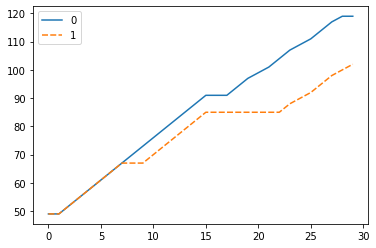

In [7]:
sns.lineplot(data=count_explored_tiles_agents(df))

'Explored' consists of a exploration-map from each agent.

__Experiment 2__

In [8]:
df = read_data('1_pathfinding_1_random_agents')
df.head(5)

,agents_n,explored
time,,
1,2,"[[[False, False, False, False, False, False, F..."
2,2,"[[[False, False, False, False, False, False, F..."
3,2,"[[[False, False, False, False, False, False, F..."
4,2,"[[[False, False, False, False, False, False, F..."
5,2,"[[[False, False, False, False, False, False, F..."


<AxesSubplot:>

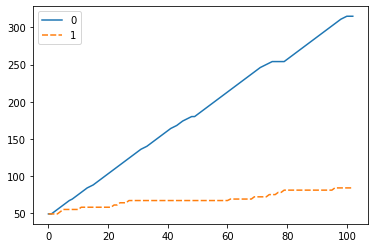

In [9]:
sns.lineplot(data=count_explored_tiles_agents(df))

__Experiment 3__

In [10]:
df = read_data('1_pathfinding_1_random_speed_agent')
df.head(5)

,agents_n,explored
time,,
1,2,"[[[False, False, False, False, False, False, F..."
2,2,"[[[False, False, False, False, False, False, F..."
3,2,"[[[False, False, False, False, False, False, F..."
4,2,"[[[False, False, False, False, False, False, F..."
5,2,"[[[False, False, False, False, False, False, F..."


<AxesSubplot:>

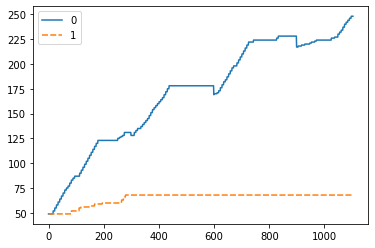

In [11]:
sns.lineplot(data=count_explored_tiles_agents(df))

__Experiment 4__

In [12]:
df = read_data('2_pathfinding_speed_agents')
df.head(5)

,agents_n,explored
time,,
1,2,"[[[False, False, False, False, False, False, F..."
2,2,"[[[False, False, False, False, False, False, F..."
3,2,"[[[False, False, False, False, False, False, F..."
4,2,"[[[False, False, False, False, False, False, F..."
5,2,"[[[False, False, False, False, False, False, F..."


<AxesSubplot:>

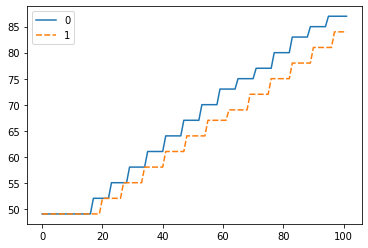

In [13]:
sns.lineplot(data=count_explored_tiles_agents(df))

### Resultaten plotten


Ik weet niet zeker of we dit hier kwijt kunnen :)
### Beschouwing van de impact van het werk